In [1]:
%pylab inline

import scipy.linalg as linear
from scipy.optimize import nnls
from numpy.linalg import matrix_rank
from styles import slides

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gauss_elimination(A):
    M = copy(A)
    
    m, n = M.shape
    for k in xrange(min([m, n])):
        imax = argmax(M[k:, k])
        if M[imax, k] == 0.0: raise ValueError
        #k = imax
        for i in xrange(k+1, m):
            for j in xrange(k+1, n):
                M[i, j] = M[i, j] - M[k, j]*(M[i, k]/M[k, k])
            M[i, k] = 0.0
    return M

def back_substitution(U, n=None):
    if n==None: n = U.shape[0]
    M = U[:, :n]
    b = U[:, n]
    x = zeros(n)
    for i in xrange(n-1, -1, -1):
        x[i] = (1./M[i, i])*(b[i]-sum(M[i, i+1:]*x[i+1:]))
    return x

In [3]:
M = array([[2, 1, -1], [-3, -1, 2], [-2, 1, 2]], dtype=float)
b = array([8, -11, -3], dtype=float)

Mb = column_stack((M, b))
U  = gauss_elimination(Mb)
print U

print back_substitution(U)

[[ 2.   1.  -1.   8. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   0.  -1.   1. ]]
[ 2.  3. -1.]


In [4]:
#READ MODELS
models = loadtxt("../../mateu+2015/bc2003_hr_stelib_m62_chab_ssp.ised")[:, :5]
wl = models[:, 0]
M  = copy(models[:, 1:])

rw = array(range(1, 5))/10.
O  = dot(M, rw)

sigma = O/1e1
O = O + random.randn(wl.size)*sigma
#O /= sigma
#M /= repeat(reshape(sigma, (sigma.size, 1)), M.shape[1], 1)

#APPLY GAUSSIAN ELIMINATION
MO = column_stack((M, O))                   #This is the augmented matrix (M|O)

U  = gauss_elimination(M)
UO = gauss_elimination(MO)

#CLASSIFY
N_w     = size(rw)
rank_M  = matrix_rank(U)
rank_MO = matrix_rank(UO)

print N_w, rank_M, rank_MO

4 4 5


        Real        GE-BS           LS         NNLS
    1.00e-01    -1.58e+02     9.70e-02     9.70e-02
    2.00e-01    -8.82e+01     1.85e-01     1.85e-01
    3.00e-01     6.37e+02     1.94e-01     1.94e-01
    4.00e-01    -2.33e+02     7.44e-01     7.44e-01


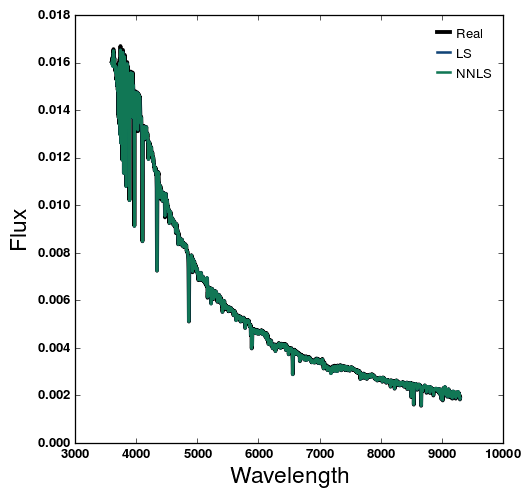

In [5]:
weights = back_substitution(UO, rank_M)
w_lsq   = linear.lstsq(M, O)[0]
w_nnls  = nnls(M, O)[0]

print "{0:>12s} {1:>12s} {2:>12s} {3:>12s}".format("Real", "GE-BS", "LS", "NNLS")
for i in xrange(rw.size):
    print "{0:12.2e} {1:12.2e} {2:12.2e} {3:12.2e}".format(rw[i], weights[i], w_lsq[i], w_nnls[i])

plot(wl, array([sum(models[i, 1:]*rw) for i in xrange(wl.size)]), "-k", lw=3, label="Real")
#plot(wl, array([sum(models[i, 1:]*weights) for i in xrange(wl.size)]), "-", label="GE-BS")
plot(wl, array([sum(models[i, 1:]*w_lsq) for i in xrange(wl.size)]), "-", label="LS")
plot(wl, array([sum(models[i, 1:]*w_nnls) for i in xrange(wl.size)]), "-", label="NNLS")

legend(loc=0)

xlabel("Wavelength")
ylabel("Flux")

In [6]:
wli = array([0, 400, 900, 1400, 1900, 2400, 2900, 3400, 3900, 4400, 4900, 5400], dtype=int)

#READ MODELS
models = loadtxt("../../mateu+2015/bc2003_hr_stelib_m62_chab_ssp.ised")[:, :8]
wl = models[wli, 0]
M  = copy(models[wli, 1:])

rw = array(range(1, 8))/10.
O  = dot(M, rw)

sigma = O/20.
O = O + random.randn(wl.size)*sigma
O /= sigma
M /= repeat(reshape(sigma, (sigma.size, 1)), M.shape[1], 1)

#APPLY GAUSSIAN ELIMINATION
MO = column_stack((M, O))                   #This is the augmented matrix (M|O)

U  = gauss_elimination(M)
UO = gauss_elimination(MO)

#CLASSIFY
N_w     = size(rw)
rank_M  = matrix_rank(U)
rank_MO = matrix_rank(UO)

print N_w, rank_M, rank_MO

7 7 8


        Real        GE-BS           LS         NNLS
    1.00e-01    -1.71e+01     1.69e-02     5.37e-01
    2.00e-01     3.02e+00     2.42e-01     0.00e+00
    3.00e-01    -3.30e+01    -1.42e-01     3.87e-01
    4.00e-01     1.56e+02    -5.81e-01     0.00e+00
    5.00e-01    -4.05e+01     8.27e+00     0.00e+00
    6.00e-01    -6.17e+01    -1.24e+01     0.00e+00
    7.00e-01    -1.00e+01     1.10e+01     6.49e+00


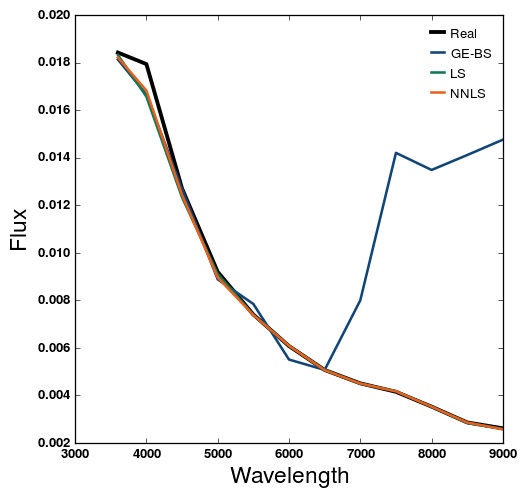

In [7]:
weights = back_substitution(UO, rank_M)
w_lsq   = linear.lstsq(M, O)[0]
w_nnls  = nnls(M, O)[0]

print "{0:>12s} {1:>12s} {2:>12s} {3:>12s}".format("Real", "GE-BS", "LS", "NNLS")
for i in xrange(rw.size): print "{0:12.2e} {1:12.2e} {2:12.2e} {3:12.2e}".format(rw[i], weights[i], w_lsq[i], w_nnls[i])

plot(wl, array([sum(models[wli[i], 1:]*rw) for i in xrange(wl.size)]), "-k", lw=3, label="Real")
plot(wl, array([sum(models[wli[i], 1:]*weights) for i in xrange(wl.size)]), "-", label="GE-BS")
plot(wl, array([sum(models[wli[i], 1:]*w_lsq) for i in xrange(wl.size)]), "-", label="LS")
plot(wl, array([sum(models[wli[i], 1:]*w_nnls) for i in xrange(wl.size)]), "-", label="NNLS")
legend(loc=0)

xlabel("Wavelength")
ylabel("Flux")